In [1]:
%autosave 20
import math 
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# from matplotlib.colors import ListedColormap
# from sklearn.utils import shuffle
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Autosaving every 20 seconds


In [2]:
list_sensor=pd.read_csv("list_sensor1.csv", delimiter=",",names=["id","factor"])
list_units=pd.read_csv("list_units1.csv", delimiter=",",names=["id","factor"]) 
list_type=pd.read_csv("list_types1.csv", delimiter=",",names=["id","factor"]) 
# df=pd.read_csv("Sample dataset values1.csv",delimiter=",", 
#                     names=["packet_no","Sensor","Type","Units","time","Flag","Value","Key"])
# df = shuffle(df)
# df.to_csv("Sample dataset values1.csv",mode="w",index=False)
df=pd.read_csv("C:/Users/HP/OneDrive - Newcastle University/Dissertation/Data_sets/Sample dataset values1.csv")
df.head(5)
df.shape
total_row=df.shape[0]
trial_row=int(total_row-(total_row*0.30))
print("total rows for training")
print(trial_row)

,Sensor,Type,Units,time,Flag,Value
0,PER_AIRMON_MESH301245,PM2.5,ugm -3,2020-05-21 03:45:00,0.0,5.640000
1,PER_AIRMON_MESH1911150,PM10,ugm -3,2020-05-30 18:44:00,0.0,6.357000
2,PER_AIRMON_MESH301245,PM10,ugm -3,2020-05-29 15:19:00,0.0,6.310000
3,PER_AIRMON_MESH1911150,PM 4,ugm -3,2020-05-24 14:56:00,0.0,0.380000
4,PER_EMOTE_1309,CO,ugm -3,2020-05-28 06:20:38,0.0,349.812463


(377203, 6)

total rows for training
264042


In [3]:
# def factorize(obj,obj_list,table,data):
#     print(data[obj].unique())
#     data_s=pd.DataFrame(data[obj].unique())
    
#     new_sensor = data_s[~data_s[0].isin(obj_list.id)]
#     ns=[]
#     if(len(new_sensor)>0):
#         l=len(obj_list)
#         for s in new_sensor[0]:
#             n=[s,l]
#             l=l+1
#             ns.append(n)
#         ns=pd.DataFrame(ns,columns=["id","factor"])
#         ns.to_csv(table,mode='a', header=False,index=False)

#     obj_list=pd.read_csv(table,delimiter=",",names=["id","factor"])
#     l=len(obj_list)
#     for i in range(0,l):
#         data.loc[data[obj]==obj_list.id[i],obj]=obj_list.factor[i]
#     print(data[obj].unique())

In [4]:
def factorize(obj,obj_list,table,data,write_to_file):
	#print(data[obj].unique()) 
	if(write_to_file):
		data_s=pd.DataFrame(data[obj].unique())
		new_sensor = data_s[~data_s[0].isin(obj_list.id)]
		ns=[]
		if(len(new_sensor)>0):
			l=len(obj_list)
			for s in new_sensor[0]:
				n=[s,l]
				l=l+1
				ns.append(n)
			ns=pd.DataFrame(ns,columns=["id","factor"])
			ns.to_csv(table,mode='a', header=False,index=False)
			
	obj_list=pd.read_csv(table,delimiter=",",names=["id","factor"])
	l=len(obj_list)
	for i in range(0,l):
		if(len(data.loc[data[obj]==obj_list.id[i]])>0):
			data.loc[data[obj]==obj_list.id[i],obj]=obj_list.factor[i]
# 	print(data[obj].unique())
    
    
    
# if(len(df.loc[df["Sensor"]=="PER_AIRMON_MESH1911150"])>0):
#     df.loc[df["Sensor"]=="PER_AIRMON_MESH1911150","Sensor"]=0

In [5]:
factorize('Sensor',list_sensor,'list_sensor1.csv',df,True)
df.Sensor.unique()

array([1, 0, 2], dtype=int64)

In [6]:
factorize('Type',list_type,'list_types1.csv',df,True)
df.Type.unique()

array([ 2,  8,  0,  6,  5,  3,  1,  7, 10,  9, 11,  4], dtype=int64)

In [7]:
factorize('Units',list_units,'list_units1.csv',df,True)
df.Units.unique()

array([0, 1, 3, 4, 5, 2], dtype=int64)

In [8]:
df.loc[df['Flag']==False,'Flag']=0
df.loc[df['Flag']==True,'Flag']=1

In [9]:
x=['Sensor', 'Type', 'Units','Value']
y=['Flag']
train=df.loc[1:trial_row,]
test=df.loc[trial_row+1:total_row,]
train.shape
test.shape

(264042, 6)

(113160, 6)

In [10]:
print(train['Flag'].value_counts())
print(test['Flag'].value_counts())

0.0    262639
1.0      1403
Name: Flag, dtype: int64
0.0    112555
1.0       605
Name: Flag, dtype: int64


In [11]:
x_train,y_train,x_test,y_test = train[x],train[y],test[x],test[y]

In [12]:
train['Flag'].value_counts()
test['Flag'].value_counts()

0.0    262639
1.0      1403
Name: Flag, dtype: int64

0.0    112555
1.0       605
Name: Flag, dtype: int64

In [13]:
#confusion Matrix
def ConfusionMatrix(x,y):
    a = confusion_matrix(x,y)
    print(a)
    b = (a[0][0]+a[1][1])/(a[1][1]+a[0][1]+a[0][0]+a[1][0])
    return round(b*100,2)

In [14]:
#Decision Tree
decision = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
decision_yhat = decision.predict(x_test)

# type(decision_yhat)
# print("zeros",(decision_yhat == 0).sum())
# print("ones",(decision_yhat == 1).sum())

print(decision.score(x_test,y_test))

decision_acc= ConfusionMatrix(decision_yhat,y_test)
print(decision_acc)




1.0
[[112555      0]
 [     0    605]]
100.0


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<Figure size 1800x720 with 0 Axes>

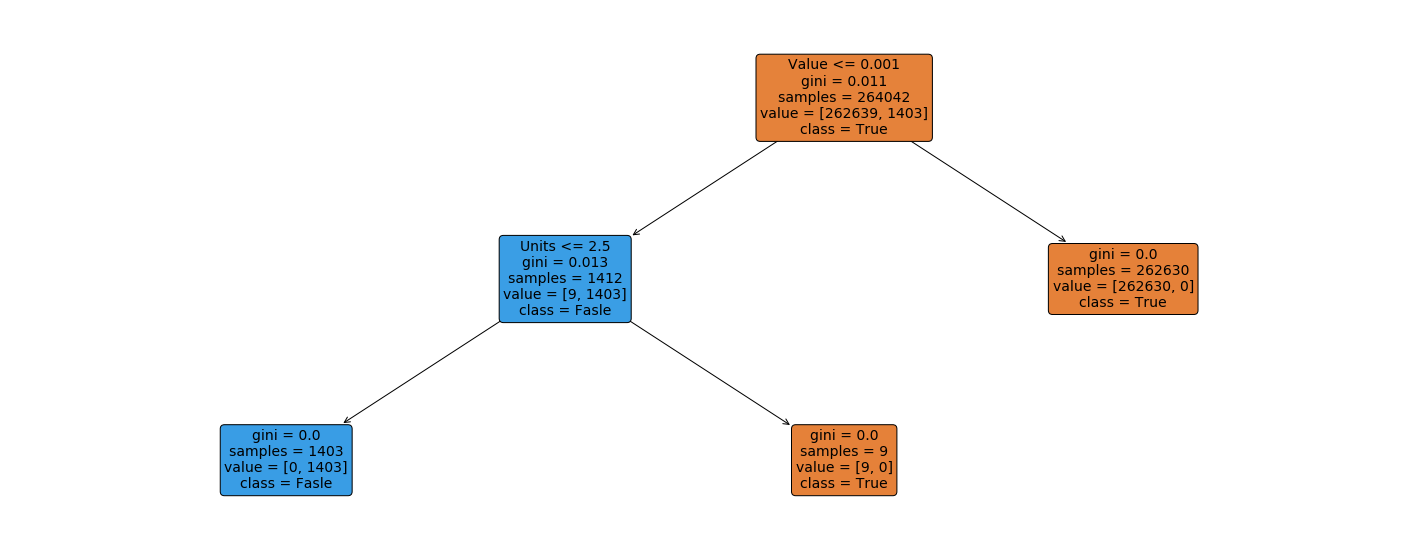

In [15]:
decision = DecisionTreeClassifier(max_depth=3)
decision.fit(x_train, y_train)

plt.figure(figsize=(25,10))
a = plot_tree(decision, 
              feature_names=x, 
              class_names=(['True','Fasle']),
              filled=True, 
              rounded=True, 
              fontsize=14)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<Figure size 1800x720 with 0 Axes>

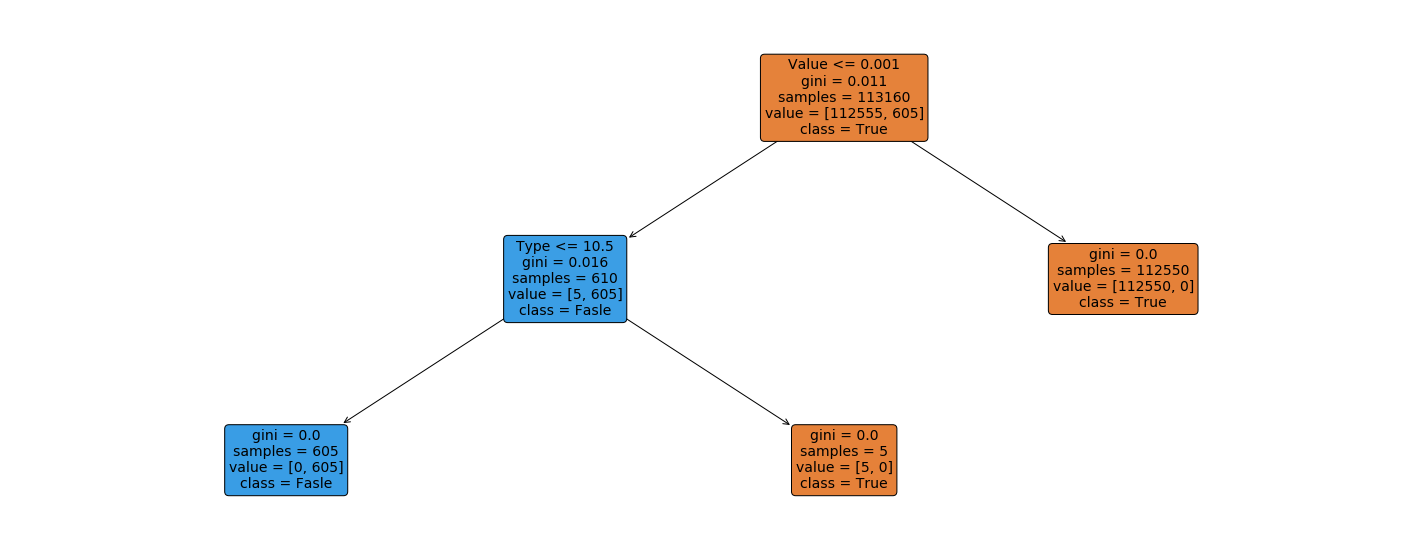

In [16]:
decision.fit(x_test,y_test)

plt.figure(figsize=(25,10))
a = plot_tree(decision, 
              feature_names=x, 
              class_names=(['True','Fasle']),
              filled=True, 
              rounded=True, 
              fontsize=14)

C:\Users\HP\Anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


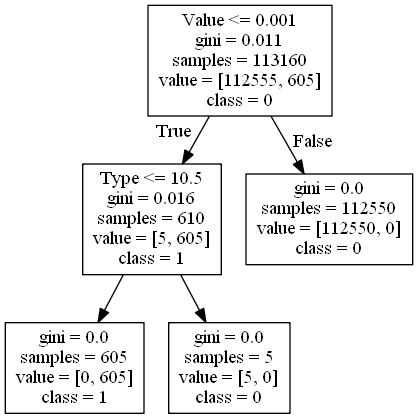

In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

x=['Sensor', 'Type', 'Units','Value']
dot_data = StringIO()
dot_data=tree.export_graphviz(decision, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x,class_names=(['True','Fasle']))
dot_data=tree.export_graphviz(decision, out_file=None,feature_names = x,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# import io
# dot_data = io.StringIO()
# tree.export_graphviz(decision, out_file=dot_data)

# graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
# # make sure you have graphviz installed and set in path
# Image(graph.create_png())


# dot_data = StringIO()
# tree.export_graphviz(decision, out_file=None,filled=True, rounded=True,
#                 feature_names = x,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [18]:
graph.write_pdf("123.pdf")

True

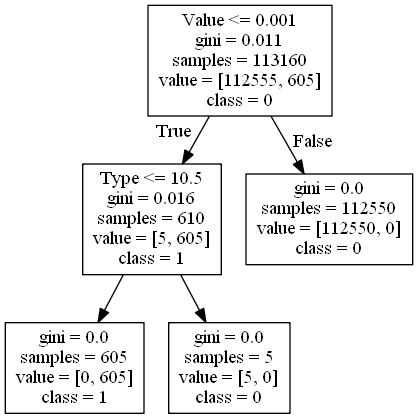

In [19]:
Image(graph.create_png())

In [20]:
df

,Sensor,Type,Units,time,Flag,Value
0,1,2,0,2020-05-21 03:45:00,0.0,5.640000
1,0,8,0,2020-05-30 18:44:00,0.0,6.357000
2,1,8,0,2020-05-29 15:19:00,0.0,6.310000
3,0,0,0,2020-05-24 14:56:00,0.0,0.380000
4,2,6,0,2020-05-28 06:20:38,0.0,349.812463
...,...,...,...,...,...,...
377198,2,10,0,2020-05-18 11:53:19,0.0,57.747993
377199,0,8,0,2020-05-15 18:13:00,0.0,5.203000
377200,2,7,3,2020-05-12 02:43:00,0.0,52.000000
377201,1,2,0,2020-05-16 03:34:00,0.0,3.170000


In [22]:
# temp_data=pd.read_csv("C:/Users/HP/OneDrive - Newcastle University/Dissertation/Data_sets/testonesensor.csv",delimiter=",", names=["Sensor","Type","Units","time","Flag","Value"])

In [23]:
import warnings
warnings.filterwarnings("ignore")
factorize('Sensor',list_sensor,'list_sensor1.csv',temp_data,False)
temp_data.Sensor.unique()
print("1")
factorize('Type',list_type,'list_types1.csv',temp_data,False)
temp_data.Type.unique()
print("2")
factorize('Units',list_units,'list_units1.csv',temp_data,False)
temp_data.Units.unique()

NameError: name 'temp_data' is not defined

In [ ]:
if(df.shape[0]):
    print("data is there")
else:
    print("data")

In [ ]:
for i in range(0,2):
    i